# GPSIR defined with classes

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np


## Definition of Some Random Variables

In [2]:
def Bernoulli(p):
    """Simulates a random variable with Bernoulli distribution
    with parameter p.
        
    Parameters
    ----------
    p : float
        The parameter of the Bernoulli distribution.

    Returns
    -------
    int
        0 or 1 depending of the result of the experiment
        
    """
    u = random.random()
    if u < p:
        return 1
    else:
        return 0

def Geometric(p):
    """Simulates a random variable with Gemoetric distribution
    with probability of success p.
        
    Parameters
    ----------
    p : float
        The probability of success of a Bernoulli trial.

    Returns
    -------
    L : int
        The number L of Bernoulli trials needed to get one success.
        
    """
    L = 0
    aux = 0
    while aux == 0:
        if Bernoulli(p) == 1:
            aux = 1
        L += 1
    return L

def Constant(c):
    """Simulates a random variable, X, with constant distribution.
        
    Parameters
    ----------
    c : float
        The constant such that P(X = c) = 1.

    Returns
    -------
    c : float
        The constant such that P(X = c) = 1.
        
    """
    return c

def Uniform(limits):
    """Simulates a random variable with Uniform distribution
    over the interval [limits[0],limits[1]].
        
    Parameters
    ----------
    limits : list
        List with the lower bownd of the interval where the random
        variable is defined as first item and the upper bownd
        as second item.

    Returns
    -------
    float
        A number between [limits[0],limits[1]].
    """
    return limits[0] + (limits[1]-limits[0])*random.random()


## Definition of the Class Person

In [3]:
class Person(object):
    """
    A class used to represent an individual participating in the dynamics of the epidemy 

    ...

    Attributes
    ----------
    contacts: dict
        A dictionary in which the individual's contacts are recorded 
        with the contact time as the key and a list of the individuals with 
        whom there was contact as the value.
        (default {}).
        
    infections_s1: dict
        A dictionary in which the contagions of the first strain
        generated by the individual are recorded with the day of contagion 
        as the key and the number of contagions as the value.
        (default {}).
        
    infections_s2: dict
        A dictionary in which the contagions of the second strain
        generated by the individual are recorded with the day of contagion 
        as the key and the number of contagions as the value.
        (default {}).
    
    tau : int
        The number of days that the first infection of the individual 
        will last. 
        (default 0).
        
    lamb : int
        The number of days that the individual will be recovered and the 
        antibodies will protect him or her. 
        (default 0).
        
    tau2 : int
        The number of days that the second infection of the individual 
        will last.
        (default 0).
    
    index : int
        The index with which the person is identified.
    
    status : dict
        A dictionary in which the individual's status at each time is recorded 
        with the time as the key and the population to which it belongs.
    
    age : int
        The age of the individual.
    
    comorbidities : list
        A list with the comorbidities of the individual 
        (default an empty list []).

    Methods
    -------
    set_tau(distribution, parameter):
        Sets the number of days that the first infection will last
        according to a given distribution with a given parameter.
        
    set_lamb(distribution, parameter):
        Sets the number of days that the individual will be recovered 
        and the antibodies will protect him or her according to a given 
        distribution with a given parameter.
        
    set_tau2(distribution, parameter):
        Sets the number of days that the second infection will last
        according to a given distribution with a given parameter.
    
    set_status(t, s):
        Adds the status, s, of the individual at time, t, to the dictionary
        estatus.
        
    set_contact(t, person):
        It adds a contact with a person at the time t to the dictionary of 
        contacts.
        
    add_infection_s1(t):
        It adds a infection generated at the time t to the dictionary of 
        infections of the first strain.
    
    add_infection_s2(t):
        It adds a infection generated at the time t to the dictionary of 
        infections of the second strain.
        
    get_contacts():
        Prints the contacts of the individual at each time showing the time of
        the contact and a tuple containing the index of the person with whom 
        there was contact and the population to which it belongs.
    """
    
    def __init__(self, index, status, age, comorbidities = []):
        """
        Parameters
        ----------
        index : int
            The index with which the person is identified.
        
        status : dict
            A dictionary in which the individual's status at each time is recorded 
            with the time as the key and the population to which it belongs.
    
        age : int
            The age of the individual.
    
        comorbidities : list
            A list with the comorbidities of the individual 
            (default an empty list []).
        """
        
        self.contacts = {}
        self.infections_s1 = {}
        self.infections_s2 = {}
        self.tau = 0
        self.lamb = 0
        self.tau2 = 0
        self.index = index
        self.status = status
        self.age = age
        self.comorbidities = comorbidities
        
    def set_tau(self, distribution, parameter):
        """Sets the number of days that the first infection will last
        according to a given distribution with a given parameter.
        
        Parameters
        ----------
        distribution : function
            probability distribution of the length of the infectious state for an
            individual (tau).
        parameter : float
            parameter of the probability distribution of the length of the first infectious 
            state for an individual (tau).
        """
        
        self.tau = distribution(parameter)
        
    def set_lamb(self, distribution, parameter):
        """Sets the number of days that the individual will be recovered 
        and the antibodies will protect him or her according to a given 
        distribution with a given parameter.
        
        Parameters
        ----------
        distribution : function
            probability distribution of the length of the inmune state for an
            individual (lamb).
        parameter : float
            parameter of the probability distribution of the length of the inmune 
            state for an individual (lamb).
        """
        
        self.lamb = distribution(parameter)
        
    def set_tau2(self, distribution, parameter):
        """Sets the number of days that the second infection will last
        according to a given distribution with a given parameter.
        
        Parameters
        ----------
        distribution : function
            probability distribution of the length of the second infectious state for an
            individual (tau2).
        parameter : float
            parameter of the probability distribution of the length of the second infectious 
            state for an individual (tau2).
        """
        
        self.tau2 = distribution(parameter)

    def set_status(self, t, s):
        """Sets the status, s, of the individual at time, t, to the dictionary
        estatus.
        
        Parameters
        ----------
        t : int
            The time for which the status will be seted.
        s : str
            The population to which it the individual belongs at time t
            (S = susceptible, I = infected, R = removed).
        """
        
        self.status[t] = s

    def set_contact(self, t, person):
        """It adds a contact with a person at the time t to the dictionary of 
        contacts.
        
        This method receives as parameters the time in which the contact was made 
        and the person with whom it was made. If there has not been a contact in 
        that time, it creates a new time key and assigns it a list with the person 
        with whom there was contact. In case there was already a contact at that time, 
        the person is added to the contacts list.
        
        Parameters
        ----------
        t : int
            The time in which the contact happened.
        person : Person
            The individual with whom there was contact.
        """

        if t in self.contacts:
            self.contacts[t].append(person)
        else:
            self.contacts[t] = [person]
            
    def add_infection_s1(self, t):
        """It adds a infection generated at the time t to the dictionary of 
        infections of the first strain.
        
        Parameters
        ----------
        t : int
            The time in which the ifection happened.
        """

        if t in self.infections_s1:
            self.infections_s1[t] += 1
        else:
            self.infections_s1[t] = 1
            
    def add_infection_s2(self, t):
        """It adds a infection generated at the time t to the dictionary of 
        infections of the second strain.
        
        Parameters
        ----------
        t : int
            The time in which the ifection happened.
        """

        if t in self.infections_s2:
            self.infections_s2[t] += 1
        else:
            self.infections_s2[t] = 1

    def get_contacts(self):
        """Prints the contacts of the individual at each time showing the time of
        the contact and a tuple containing the index of the person with whom 
        there was contact and the population to which it belongs."""
        
        print("\nContacts of person {}:".format(self.index))
        for t in self.contacts:
            s = str(t)+ " :"
            for c in self.contacts[t]:
                s += " ({},{})".format(c.index,c.status[t])
            print(s)

    def __eq__(self, other):
        """
        We overwrite the method __eq__ in orther to give sense to the boolean
        operator == in the class Persona. In orther to overwirte this method
        we recibe as parameters the object itself and other object to compare.
        The new coparison criterion is the index.
        """
        return (self.index == other.index)


## 1.1 Model With Cross Immunity

In [4]:
def GPSIR_1(S12, I10, I20, R0, T, alpha, beta1, beta2, tau_distribution = Geometric, 
          tau_parameter = 1/21, inoculation_distribution = Constant,
          inoculation_parameter = 1, inoculation_threshold = 1):
    """Simulates the dynamics of the epidemy
        
    Parameters
    ----------
    S12 : int
        Initial population of susceptible individuals.
    
    I10 : int
        Initial population of individuals infected with the 
        strain 1.
        
    I20 : int
        Initial population of individuals infected with the 
        strain 2.
    
    R0 : int
        Initial population of recovered individuals.
    
    T : int
        Number of days of the simulation.
    
    alpha: float
        Probability of formation of an edge.
    
    beta1: float
        Probability of contagion given infectious contagion of
        the strain 1.
        
    beta2: float
        Probability of contagion given infectious contagion of
        the strain 2.
    
    tau_distribution : function, optional
        Distribution of the number of days that the individual 
        will be infected (default is Gemoetric).
    
    tau_parameter: float, optional
        Parameter of the distribution of the number of days that
        the individual will be infected (default is 1/21).
        
    inoculation_distribution: function, optional
        Distribution of the viral load to which a susceptible 
        individual is exposed in an infectious contact
        (default is Constant).
        
    inoculation_parameter: float, optional
        Parameter of the distribution of the viral load to 
        which a susceptible is exposed in an infectious contact
        (default is 1).
    
    inoculation_threshold: float, optional
        Viral load threshold for contagion (default is 1).
    

    Returns
    -------
    Population : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 
        
    """

    Population   = []

    # The susceptible are added to the population
    for i in range(1,S12+1):
        p = Person(i,{0:'S12'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
    
    # The infected with strain 1 are added to the population
    for i in range(S12+1,S12+I10+1):
        p = Person(i,{0:'I1'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
        
    # The infected with strain 2 are added to the population
    for i in range(S12+I10+1,S12+I10+I20+1):
        p = Person(i,{0:'I2'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
    
    Population_copy = Population.copy()
    
    # We iterate over the days of the simulation
    for t in range(1,T+1):
        
        random.shuffle(Population_copy)
        
        # Iteration per day over each individual of the population
        for p1 in Population_copy:

            # Iteration per individual over the rest of the population in 
            # orther to generate contats between individuals.
            for p2 in Population_copy:
                if p1.status[t-1] == 'S12' and p1 != p2 and Bernoulli(alpha):
                    p1.set_contact(t-1,p2)

            # Here starts the modification of the populations S, I, and R.

            # Modifications over the Susceptible population (S)
            if p1.status[t-1] == 'S12':
                
                # Case in which there were contacts
                if (t-1) in p1.contacts:
                    viral_load_1 = 0
                    viral_load_2 = 0
                    
                    temp = 0
                    
                    while temp < len(p1.contacts[t-1]) and p1.status[t-1] == 'S12':
                        
                        # for each contact we check if there was efective infection of the
                        # first strain
                        if p1.contacts[t-1][temp].status[t-1] == 'I1' and Bernoulli(beta1):
                            
                            viral_load_1 += inoculation_distribution(inoculation_parameter)
                            p1.set_status(t,'I1')
                            p1.contacts[t-1][temp].add_infection_s1(t)
                            break
                        
                        # for each contact we check if there was efective infection of the
                        # second strain
                        elif p1.contacts[t-1][temp].status[t-1] == 'I2' and Bernoulli(beta2):
                            
                            viral_load_2 += inoculation_distribution(inoculation_parameter)
                            p1.set_status(t,'I2')
                            p1.contacts[t-1][temp].add_infection_s2(t)
                            break
                        
                        temp += 1
                    
                    # Case in which the viral load did not surpassed the inoculation threshold
                    if (viral_load_1 + viral_load_2 == 0):
                        p1.set_status(t,'S12')
                
                # Case in which there were no contacts
                else:
                    p1.set_status(t,'S12')

            # Modifications over the Infected population with the first strain (I1)
            elif p1.status[t-1] == 'I1':
                
                # Case in which the days of infection aren´t over
                if p1.tau > 0:
                    p1.set_status(t,'I1')
                    p1.tau -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R')
            
            # Modifications over the Infected population with the first strain (I2)
            elif p1.status[t-1] == 'I2':
                
                # Case in which the days of infection aren´t over
                if p1.tau > 0:
                    p1.set_status(t,'I2')
                    p1.tau -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R')

            # Modifications over the Removed population
            else:
                p1.set_status(t,'R')
    
    return Population


## Results

In [6]:
T = 365
Population_1 = GPSIR_1(500, 23, 3, 0, T, alpha = 0.001, beta1 = 1-np.exp(-0.2), beta2 = 1-np.exp(-0.6), tau_distribution = Uniform, 
          tau_parameter = [14,28])


### Final Number of Susceptible, Infectous, and Removed Individuals

In [7]:
def final_populations_1(Population):
    """Counts de number of susceptible, infected, and recovered individuals at the
    end of the simulation.
        
    This function receives as parameter the list of the population after the simulation 
    has been run. It counts the number of susceptible, infected, and recovered individuals 
    at the end of the simulation and prints them.
        
    Parameters
    ----------
    Population : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 

    """
    S12f = 0; I1f = 0; I2f = 0; Rf = 0
    for person in Population:
        if person.status[T] == 'S12':
            S12f += 1
        elif person.status[T] == 'I1':
            I1f += 1
        elif person.status[T] == 'I2':
            I2f += 1
        else:
            Rf += 1
    print("Susceptible: {}\nInfectious 1: {}\nInfectious 2: {}\nRemoved: {}".format(S12f,I1f,I2f,Rf))
    
final_populations_1(Population_1)

Susceptible: 4
Infectious 1: 0
Infectious 2: 0
Removed: 522


### Dynamics for Each Individual

In [8]:
def Dynamics(Population):
    for person in Population:
        print("\nDynamics for the individual {}:".format(person.index))
        print(person.status)

#Dynamics(Population_1)

def Individual_Dynamics(Population, i):
    person = Population[i-1]
    print("\nDynamics for the individual {}:".format(person.index))
    print(person.status)
    
#Individual_Dynamics(Population_1, 1)

### Contacts for One Individual

In [9]:
def Individual_Contacts(Population, i):
    Population_1[i-1].get_contacts()

#Individual_Contacts(Population_1, 1)

### Infections of Strain 1 Generated by each individual indexed by time

In [10]:
for person in Population_1:
    if len(person.infections_s1) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(person.infections_s1)


Infections generated by person 4:
{15: 1, 23: 1}

Infections generated by person 10:
{19: 1}

Infections generated by person 15:
{17: 1, 23: 1}

Infections generated by person 29:
{25: 1}

Infections generated by person 34:
{21: 1}

Infections generated by person 39:
{20: 1}

Infections generated by person 46:
{19: 1}

Infections generated by person 60:
{17: 1, 23: 1}

Infections generated by person 67:
{27: 1}

Infections generated by person 75:
{13: 1}

Infections generated by person 81:
{10: 1, 19: 1}

Infections generated by person 100:
{20: 1, 25: 1}

Infections generated by person 110:
{21: 1, 22: 1}

Infections generated by person 116:
{24: 1}

Infections generated by person 132:
{24: 1}

Infections generated by person 160:
{29: 1}

Infections generated by person 176:
{18: 1}

Infections generated by person 184:
{22: 1}

Infections generated by person 195:
{15: 1}

Infections generated by person 209:
{30: 1}

Infections generated by person 219:
{6: 1, 18: 1}

Infections generat

### Infections of Strain 1 Generated by each individual

In [11]:
for person in Population_1:
    if len(person.infections_s1) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(sum(person.infections_s1.values()))



Infections generated by person 4:
2

Infections generated by person 10:
1

Infections generated by person 15:
2

Infections generated by person 29:
1

Infections generated by person 34:
1

Infections generated by person 39:
1

Infections generated by person 46:
1

Infections generated by person 60:
2

Infections generated by person 67:
1

Infections generated by person 75:
1

Infections generated by person 81:
2

Infections generated by person 100:
2

Infections generated by person 110:
2

Infections generated by person 116:
1

Infections generated by person 132:
1

Infections generated by person 160:
1

Infections generated by person 176:
1

Infections generated by person 184:
1

Infections generated by person 195:
1

Infections generated by person 209:
1

Infections generated by person 219:
2

Infections generated by person 227:
1

Infections generated by person 241:
2

Infections generated by person 257:
2

Infections generated by person 283:
1

Infections generated by person 288:


### Infections of Strain 2 Generated by each individual indexed by time

In [12]:
for person in Population_1:
    if len(person.infections_s2) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(person.infections_s2)


Infections generated by person 1:
{27: 1}

Infections generated by person 5:
{23: 1}

Infections generated by person 8:
{15: 1}

Infections generated by person 9:
{11: 1, 14: 2, 18: 1, 20: 1, 24: 1, 26: 1, 29: 1}

Infections generated by person 12:
{24: 2, 34: 1}

Infections generated by person 13:
{44: 1}

Infections generated by person 14:
{25: 1, 49: 1}

Infections generated by person 18:
{22: 1, 23: 1, 24: 1}

Infections generated by person 20:
{39: 1}

Infections generated by person 21:
{31: 1}

Infections generated by person 23:
{12: 1, 13: 1, 14: 1, 19: 1, 23: 1, 26: 1}

Infections generated by person 31:
{34: 1}

Infections generated by person 32:
{22: 1}

Infections generated by person 35:
{22: 1}

Infections generated by person 37:
{22: 1, 30: 1}

Infections generated by person 41:
{22: 1}

Infections generated by person 43:
{20: 1}

Infections generated by person 45:
{43: 1, 48: 1}

Infections generated by person 47:
{10: 1, 19: 1}

Infections generated by person 48:
{31: 1

### Infections of Strain 2 Generated by each individual

In [13]:
for person in Population_1:
    if len(person.infections_s2) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(sum(person.infections_s2.values()))


Infections generated by person 1:
1

Infections generated by person 5:
1

Infections generated by person 8:
1

Infections generated by person 9:
8

Infections generated by person 12:
3

Infections generated by person 13:
1

Infections generated by person 14:
2

Infections generated by person 18:
3

Infections generated by person 20:
1

Infections generated by person 21:
1

Infections generated by person 23:
6

Infections generated by person 31:
1

Infections generated by person 32:
1

Infections generated by person 35:
1

Infections generated by person 37:
2

Infections generated by person 41:
1

Infections generated by person 43:
1

Infections generated by person 45:
2

Infections generated by person 47:
2

Infections generated by person 48:
1

Infections generated by person 49:
2

Infections generated by person 51:
2

Infections generated by person 54:
1

Infections generated by person 56:
2

Infections generated by person 57:
1

Infections generated by person 58:
2

Infections gene

### Plot of The Simulation

In [14]:
def Plot_Dynamics_11(simulation, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    S12 = []; I1 = []; I2 = []; R = []
    for t in range(T+1):
        S12t = 0; I1t = 0; I2t = 0; Rt = 0
        for person in simulation:
            if person.status[t] == 'S12':
                S12t += 1
            elif person.status[t] == 'I1':
                I1t += 1
            elif person.status[t] == 'I2':
                I2t += 1
            else:
                Rt += 1
        S12.append(S12t)
        I1.append(I1t)
        I2.append(I2t)
        R.append(Rt)

    plt.plot(range(T+1), S12, 'b-', label = 'S12')
    plt.plot(range(T+1), I1, 'r-', label = 'I1')
    plt.plot(range(T+1), I2, 'g-', label = 'I2')
    plt.plot(range(T+1), R, 'k-', label = 'R')
    plt.legend()
    plt.xlabel('Time (days)')
    plt.ylabel('Population Size')
    plt.title('')
    plt.show()

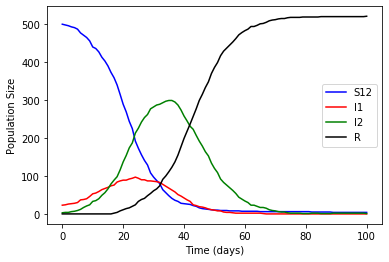

In [15]:
Plot_Dynamics_11(Population_1, 100)

In [16]:
def Plot_Dynamics_12(simulation, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    S = []; I = []; R = []
    for t in range(T+1):
        St = 0; It = 0; Rt = 0
        for person in simulation:
            if person.status[t] == 'S12':
                St += 1
            elif person.status[t] == 'I1' or person.status[t] == 'I2':
                It += 1
            else:
                Rt += 1
        S.append(St)
        I.append(It)
        R.append(Rt)

    plt.plot(range(T+1), S, 'b-', label = 'S')
    plt.plot(range(T+1), I, 'r-', label = 'I')
    plt.plot(range(T+1), R, 'k-', label = 'R')
    plt.legend()
    plt.xlabel('Time (days)')
    plt.ylabel('Population Size')
    plt.title('')
    plt.show()

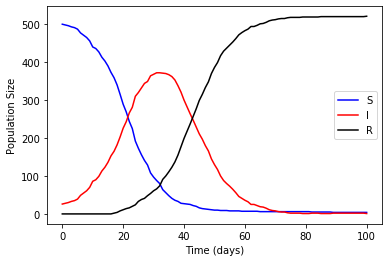

In [17]:
Plot_Dynamics_12(Population_1, 100)

## Histograms

In [18]:
def RtHistogram(simulation, T, strain):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    Infections_mean = []
    if strain == 1:
        for person in simulation:
            if len(person.infections_s1) != 0:
                Infections_mean.append(sum(person.infections_s1.values())/len(person.infections_s1.keys()))
    else:
        for person in simulation:
            if len(person.infections_s2) != 0:
                Infections_mean.append(sum(person.infections_s2.values())/len(person.infections_s2.keys()))
    
    plt.hist(Infections_mean, bins = 15)
    plt.xlabel('Mean Number of Infections')
    plt.ylabel('Density')
    plt.title('')
    plt.show()

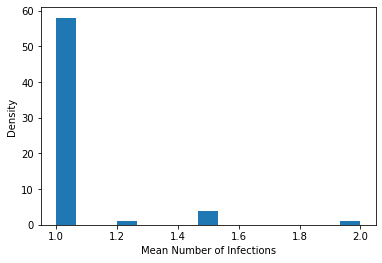

In [19]:
RtHistogram(Population_1, 100, 1)

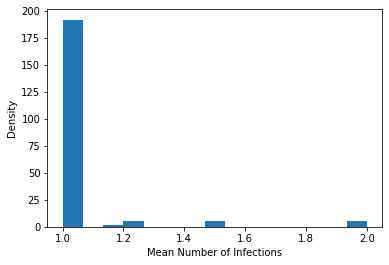

In [20]:
RtHistogram(Population_1, 100, 2)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


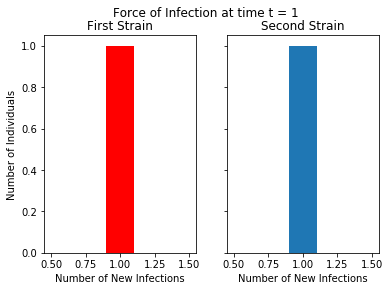

In [21]:
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
def animacion1(i): 
    
    Infections_s1 = []
    Infections_s2 = []
    I1 = 0
    I2 = 0
    for ax in (ax1, ax2):
        ax.clear()    
    for person in Population_1:
        if i in person.infections_s1.keys():
            Infections_s1.append(person.infections_s1[i])
        if i in person.infections_s2.keys():
            Infections_s2.append(person.infections_s2[i])
    
    fig.suptitle('Force of Infection at time t = {}'.format(i))
        
    ax1.hist(Infections_s1[:i],bins=5,color='red')
    ax1.set_xlabel('Number of New Infections')
    ax1.set_ylabel('Number of Individuals')
    ax1.set_title('First Strain')
        
    ax2.hist(Infections_s2[:i],bins=5)
    ax2.set_xlabel('Number of New Infections')
    ax2.set_title('Second Strain')

animator1 = FuncAnimation(fig, animacion1, frames=np.arange(1,41,1), interval=300, repeat = False)
animator1.save('TwoStrainsCrossImmunity.gif')


## 1.2. An Even More Complex Model

In [22]:
def GPSIR_2(pop_init, T, alpha, beta1, beta2, tau_distribution = Geometric, 
          tau_parameter = 1/21, inoculation_distribution = Constant,
          inoculation_parameter = 1, inoculation_threshold = 1):
    """Simulates the dynamics of the epidemy
        
    Parameters
    ----------
    pop_init : tuple
        A tuple with the initial conditions for each population
        in the graphic probabilistic SIR for two strains
    
    T : int
        Number of days of the simulation.
    
    alpha: float
        Probability of formation of an edge.
    
    beta1: float
        Probability of contagion given infectious contagion of
        the strain 1.
        
    beta2: float
        Probability of contagion given infectious contagion of
        the strain 2.
    
    tau_distribution : function, optional
        Distribution of the number of days that the individual 
        will be infected (default is Gemoetric).
    
    tau_parameter: float, optional
        Parameter of the distribution of the number of days that
        the individual will be infected (default is 1/21).
        
    inoculation_distribution: function, optional
        Distribution of the viral load to which a susceptible 
        individual is exposed in an infectious contact
        (default is Constant).
        
    inoculation_parameter: float, optional
        Parameter of the distribution of the viral load to 
        which a susceptible is exposed in an infectious contact
        (default is 1).
    
    inoculation_threshold: float, optional
        Viral load threshold for contagion (default is 1).
    

    Returns
    -------
    Population : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 
        
    """
    S120, I10, I20, R10, R10, S10, S20, I12, I21, R12 = pop_init
    
    Population = []

    # The susceptible are added to the population
    for i in range(1,S120+1):
        p = Person(i,{0:'S12'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
    
    # The infected with strain 1 are added to the population
    for i in range(S120+1,S120+I10+1):
        p = Person(i,{0:'I1'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
        
    # The infected with strain 2 are added to the population
    for i in range(S120+I10+1,S120+I10+I20+1):
        p = Person(i,{0:'I2'},21)
        p.set_tau(tau_distribution,tau_parameter)
        Population.append(p)
    
    
    # We iterate over the days of the simulation
    for t in range(1,T+1):

        random.shuffle(Population)
        # Iteration per day over each individual of the population
        for p1 in Population:

            # Iteration per individual over the rest of the population in 
            # orther to generate contats between individuals.
            for p2 in Population:
                if p1.status[t-1] == 'S12' and p1 != p2 and Bernoulli(alpha):
                    p1.set_contact(t-1,p2)
                if p1.status[t-1] == 'S1' and p1 != p2 and Bernoulli(alpha):
                    p1.set_contact(t-1,p2)
                if p1.status[t-1] == 'S2' and p1 != p2 and Bernoulli(alpha):
                    p1.set_contact(t-1,p2)

            # Here starts the modification of the populations S, I, and R.

            # Modifications over the Suceptible population
            if p1.status[t-1] == 'S12':
                
                # Case in which there were contacts
                if (t-1) in p1.contacts:
                    viral_load_1 = 0
                    viral_load_2 = 0
                    
                    # for each contact we check if there was efective infection
                    temp = 0
                    
                    while temp < len(p1.contacts[t-1]) and p1.status[t-1] == 'S12':
                        
                        if p1.contacts[t-1][temp].status[t-1] == 'I1' and Bernoulli(beta1):
                            viral_load_1 += inoculation_distribution(inoculation_parameter)
                            p1.set_status(t,'I1')
                            p1.contacts[t-1][temp].add_infection_s1(t)
                            break
                            
                        if p1.contacts[t-1][temp].status[t-1] == 'I2' and Bernoulli(beta2):
                            viral_load_2 += inoculation_distribution(inoculation_parameter)
                            p1.set_status(t,'I2')
                            p1.contacts[t-1][temp].add_infection_s2(t)
                            break
                        
                        temp += 1
                    
                    # Case in which the viral load did not surpassed the inoculation 
                    # threshold
                    if (viral_load_1 + viral_load_2 == 0):
                        p1.set_status(t,'S12')
                
                # Case in which there were no contacts
                else:
                    p1.set_status(t,'S12')

            # Modifications over the Infected population
            elif p1.status[t-1] == 'I1':
                
                # Case in which the days of infection aren´t over
                if p1.tau > 0:
                    p1.set_status(t,'I1')
                    p1.tau -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R1')
                    p.set_lamb(tau_distribution,[14,21])
                    
            elif p1.status[t-1] == 'I2':
                
                # Case in which the days of infection aren´t over
                if p1.tau > 0:
                    p1.set_status(t,'I2')
                    p1.tau -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R2')
                    p.set_lamb(tau_distribution,[14,21])
                    
            elif p1.status[t-1] == 'R1':
                
                # Case in which the days of infection aren´t over
                if p1.lamb > 0:
                    p1.set_status(t,'R1')
                    p1.lamb -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'S2')
                    
            elif p1.status[t-1] == 'R2':
                
                # Case in which the days of infection aren´t over
                if p1.lamb > 0:
                    p1.set_status(t,'R2')
                    p1.lamb -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'S1')
            
            elif p1.status[t-1] == 'S2':
                
                # Case in which there were contacts
                if (t-1) in p1.contacts:
                    viral_load = 0
                    
                    # for each contact we check if there was efective infection
                    for contact in p1.contacts[t-1]:
                        if (contact.status[t-1] == 'I2' or contact.status[t-1] == 'I12') and Bernoulli(beta2):
                            viral_load += inoculation_distribution(inoculation_parameter)
                            contact.add_infection_s2(t)
                            break
                    
                    # Case in which the viral load surpassed the inoculation threshold
                    if viral_load >= inoculation_threshold:
                        p1.set_status(t,'I12')
                        p.set_tau2(tau_distribution,[7,14])
                    
                    # Case in which the viral load did not surpassed the inoculation 
                    # threshold
                    else:
                        p1.set_status(t,'S2')
                
                # Case in which there were no contacts
                else:
                    p1.set_status(t,'S2')
                    
            elif p1.status[t-1] == 'S1':
                
                # Case in which there were contacts
                if (t-1) in p1.contacts:
                    viral_load = 0
                    
                    # for each contact we check if there was efective infection
                    for contact in p1.contacts[t-1]:
                        if (contact.status[t-1] == 'I1' or contact.status[t-1] == 'I21') and Bernoulli(beta1):
                            viral_load += inoculation_distribution(inoculation_parameter)
                            contact.add_infection_s1(t)
                            break
                    
                    # Case in which the viral load surpassed the inoculation threshold
                    if viral_load >= inoculation_threshold:
                        p1.set_status(t,'I21')
                        p.set_tau2(tau_distribution,[7,14])
                    
                    # Case in which the viral load did not surpassed the inoculation 
                    # threshold
                    else:
                        p1.set_status(t,'S1')
                
                # Case in which there were no contacts
                else:
                    p1.set_status(t,'S1')
                    
            elif p1.status[t-1] == 'I12':
                
                # Case in which the days of infection aren´t over
                if p1.tau2 > 0:
                    p1.set_status(t,'I12')
                    p1.tau2 -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R12')
                    
            elif p1.status[t-1] == 'I21':
                
                # Case in which the days of infection aren´t over
                if p1.tau2 > 0:
                    p1.set_status(t,'I21')
                    p1.tau2 -= 1
                
                # Case in which the days of infection are over
                else:
                    p1.set_status(t,'R12')

            # Modifications over the Removed population
            else:
                p1.set_status(t,'R12')
    
    return Population



## Results

In [23]:
T = 150
P_init = (450, 45, 5, 0, 0, 0, 0, 0, 0, 0)
Population_2 = GPSIR_2(P_init, T, alpha = 0.001, beta1 = 1-np.exp(-0.2), beta2 = 1-np.exp(-0.6), tau_distribution = Uniform, tau_parameter = [14,28])


### Infections of strain 1 indexed by time

In [24]:
for person in Population_2:
    if len(person.infections_s1) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(person.infections_s1)


Infections generated by person 117:
{23: 1, 28: 1}

Infections generated by person 285:
{18: 1}

Infections generated by person 308:
{11: 1, 13: 1, 19: 1}

Infections generated by person 283:
{26: 1}

Infections generated by person 406:
{3: 1}

Infections generated by person 488:
{15: 1}

Infections generated by person 478:
{12: 1}

Infections generated by person 231:
{16: 1, 22: 1}

Infections generated by person 65:
{24: 1, 32: 1}

Infections generated by person 480:
{10: 1}

Infections generated by person 119:
{25: 1}

Infections generated by person 305:
{13: 1}

Infections generated by person 492:
{15: 1}

Infections generated by person 166:
{7: 2}

Infections generated by person 5:
{16: 1}

Infections generated by person 201:
{5: 1, 10: 1}

Infections generated by person 175:
{11: 1}

Infections generated by person 454:
{4: 1, 20: 1, 25: 1}

Infections generated by person 294:
{27: 1}

Infections generated by person 80:
{17: 1, 20: 1, 26: 1}

Infections generated by person 373:
{

### Infections of strain 1

In [25]:
for person in Population_2:
    if len(person.infections_s1) != 0:
        print("\nInfections generated by person {}:".format(person.index))
        print(sum(person.infections_s1.values()))


Infections generated by person 117:
2

Infections generated by person 285:
1

Infections generated by person 308:
3

Infections generated by person 283:
1

Infections generated by person 406:
1

Infections generated by person 488:
1

Infections generated by person 478:
1

Infections generated by person 231:
2

Infections generated by person 65:
2

Infections generated by person 480:
1

Infections generated by person 119:
1

Infections generated by person 305:
1

Infections generated by person 492:
1

Infections generated by person 166:
2

Infections generated by person 5:
1

Infections generated by person 201:
2

Infections generated by person 175:
1

Infections generated by person 454:
3

Infections generated by person 294:
1

Infections generated by person 80:
3

Infections generated by person 373:
2

Infections generated by person 289:
1

Infections generated by person 288:
1

Infections generated by person 232:
1

Infections generated by person 322:
2

Infections generated by pers

In [26]:
def final_populations_2(Population):
    """Counts de number of susceptible, infected, and recovered individuals at the
    end of the simulation.
        
    This function receives as parameter the list of the population after the simulation 
    has been run. It counts the number of susceptible, infected, and recovered individuals 
    at the end of the simulation and prints them.
        
    Parameters
    ----------
    Population : list
        List with the individuals and their modified attributes after
        T days of contacts, infections and recoveries. 

    """
    S12f = 0; I1f = 0; I2f = 0; R1f = 0; R2f = 0
    S1f = 0; S2f = 0; I12f = 0; I21f = 0; R12f = 0
    for person in Population:
        if person.status[T] == 'S12':
            S12f += 1
        elif person.status[T] == 'I1':
            I1f += 1
        elif person.status[T] == 'I2':
            I2f += 1
        elif person.status[T] == 'R1':
            R1f += 1
        elif person.status[T] == 'R2':
            R2f += 1
        elif person.status[T] == 'S1':
            S1f += 1
        elif person.status[T] == 'S2':
            S2f += 1
        elif person.status[T] == 'I12':
            I12f += 1
        elif person.status[T] == 'I21':
            I21f += 1
        else:
            R12f += 1
    print("S12: {}\nI1: {}\nI2: {}\nR1: {}\nR2: {}".format(S12f,I1f,I2f,R1f,R2f))
    print("S1: {}\nS2: {}\nI12: {}\nI21: {}\nR12: {}".format(S1f,S2f,I12f,I21f,R12f))

final_populations_2(Population_2)


S12: 11
I1: 0
I2: 0
R1: 0
R2: 0
S1: 229
S2: 74
I12: 0
I21: 0
R12: 186


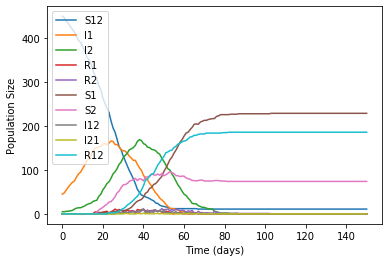

In [27]:
def Plot_Dynamics_21(simulation, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    S12 = []; I1 = []; I2 = []; R1 = []; R2 = []
    S1 = []; S2 = []; I12 = []; I21 = []; R12 = []
    for t in range(T+1):
        S12t = 0; I1t = 0; I2t = 0; R1t = 0; R2t = 0
        S1t = 0; S2t = 0; I12t = 0; I21t = 0; R12t = 0
        for person in simulation:
            if person.status[t] == 'S12':
                S12t += 1
            elif person.status[t] == 'I1':
                I1t += 1
            elif person.status[t] == 'I2':
                I2t += 1
            elif person.status[t] == 'R1':
                R1t += 1
            elif person.status[t] == 'R2':
                R2t += 1
            elif person.status[t] == 'S1':
                S1t += 1
            elif person.status[t] == 'S2':
                S2t += 1
            elif person.status[t] == 'I12':
                I12t += 1
            elif person.status[t] == 'I21':
                I21t += 1
            else:
                R12t += 1
        
        S12.append(S12t)
        I1.append(I1t)
        I2.append(I2t)
        R1.append(R1t)
        R2.append(R2t)
        S1.append(S1t)
        S2.append(S2t)
        I12.append(I12t)
        I21.append(I21t)
        R12.append(R12t)

    plt.plot(range(T+1), S12, label = 'S12')
    plt.plot(range(T+1), I1, label = 'I1')
    plt.plot(range(T+1), I2, label = 'I2')
    plt.plot(range(T+1), R1, label = 'R1')
    plt.plot(range(T+1), R2, label = 'R2')
    plt.plot(range(T+1), S1, label = 'S1')
    plt.plot(range(T+1), S2, label = 'S2')
    plt.plot(range(T+1), I12, label = 'I12')
    plt.plot(range(T+1), I21, label = 'I21')
    plt.plot(range(T+1), R12, label = 'R12')
    plt.legend()
    plt.xlabel('Time (days)')
    plt.ylabel('Population Size')
    plt.title('')
    plt.show()
    
Plot_Dynamics_21(Population_2, T)


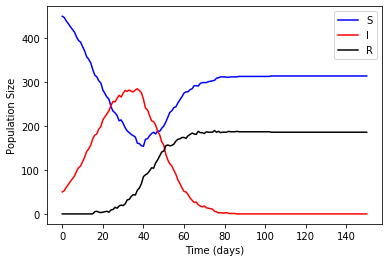

In [28]:
def Plot_Dynamics_22(simulation, T):
    """Plots the evolution of the populations of susceptible,
    infected and removed individuals over time for a simulation.
        
    Parameters
    ----------
    simulation : list
        List of Persona objects obtained from the function Simulacion_Contagios. 

    T : int
        Number of days in the simulation
    """
        
    S = []; I = []; R = []
    for t in range(T+1):
        St = 0; It = 0; Rt = 0
        for person in simulation:
            if person.status[t] == 'S12':
                St += 1
            elif person.status[t] == 'I1':
                It += 1
            elif person.status[t] == 'I2':
                It += 1
            elif person.status[t] == 'R1':
                Rt += 1
            elif person.status[t] == 'R2':
                Rt += 1
            elif person.status[t] == 'S1':
                St += 1
            elif person.status[t] == 'S2':
                St += 1
            elif person.status[t] == 'I12':
                It += 1
            elif person.status[t] == 'I21':
                It += 1
            else:
                Rt += 1
        
        S.append(St)
        I.append(It)
        R.append(Rt)


    plt.plot(range(T+1), S, "b-",label = 'S')
    plt.plot(range(T+1), I, "r-",label = 'I')
    plt.plot(range(T+1), R, "k-",label = 'R')

    plt.legend()
    plt.xlabel('Time (days)')
    plt.ylabel('Population Size')
    plt.title('')
    plt.show()
    
Plot_Dynamics_22(Population_2, T)


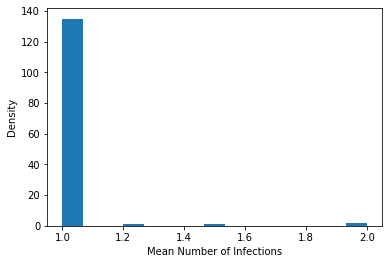

In [29]:
RtHistogram(Population_2, 100, 1)

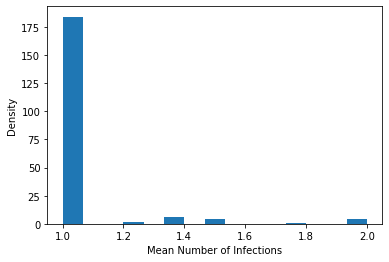

In [30]:
RtHistogram(Population_2, 100, 2)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


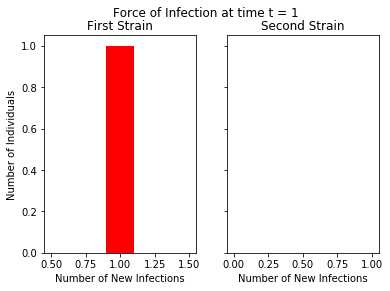

In [32]:
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
def animacion2(i): 
    
    Infections_s1 = []
    Infections_s2 = []
    I1 = 0
    I2 = 0
    for ax in (ax1, ax2):
        ax.clear()    
    for person in Population_2:
        if i in person.infections_s1.keys():
            Infections_s1.append(person.infections_s1[i])
        if i in person.infections_s2.keys():
            Infections_s2.append(person.infections_s2[i])
    
    fig.suptitle('Force of Infection at time t = {}'.format(i))
        
    ax1.hist(Infections_s1[:i],bins=5,color='red')
    ax1.set_xlabel('Number of New Infections')
    ax1.set_ylabel('Number of Individuals')
    ax1.set_title('First Strain')
        
    ax2.hist(Infections_s2[:i],bins=5)
    ax2.set_xlabel('Number of New Infections')
    ax2.set_title('Second Strain')

animator2 = FuncAnimation(fig, animacion2, frames=np.arange(1,51,1), interval=500, repeat = False)
animator2.save('TwoStrains.gif')
